In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pickle

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler

In [23]:
cleaned_df = pd.read_csv("../../data/clean/clean_dataset_df.csv")

In [25]:
# Filter dataset for Economy class
economy_class_df = cleaned_df[cleaned_df['class'] == 'Economy']

# Drop the 'class' column as it's now constant and not useful for prediction
economy_class_df = economy_class_df.drop(columns=['class'])

In [27]:
economy_class_df.head()

,airline_name,flight_code,departure_city,arrival_city,flight_duration,stops,price,days_left,departure_time_group,arrival_time_group
0,SpiceJet,SG-8709,Delhi,Mumbai,130,0,5953,1,Evening,Night
1,SpiceJet,SG-8157,Delhi,Mumbai,140,0,5953,1,Early Morning,Morning
2,Air Asia,I5-764,Delhi,Mumbai,130,0,5956,1,Early Morning,Early Morning
3,Vistara,UK-995,Delhi,Mumbai,135,0,5955,1,Morning,Afternoon
4,Vistara,UK-963,Delhi,Mumbai,140,0,5955,1,Morning,Morning


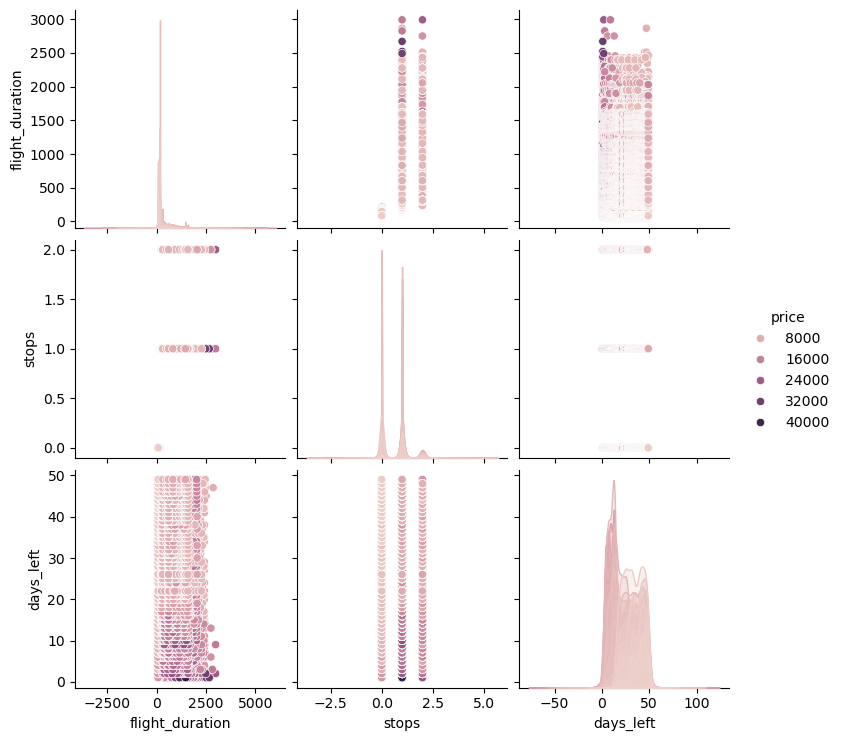

In [31]:
sns.pairplot(economy_class_df, hue="price")
plt.show()

In [41]:
categorical_columns = ['airline_name', 'departure_city', 'arrival_city', 'departure_time_group', 'arrival_time_group']
econ_encoder = OneHotEncoder(sparse_output=False)
econ_encoded_features = econ_encoder.fit_transform(economy_class_df[categorical_columns])
econ_encoded_feature_names = econ_encoder.get_feature_names_out(categorical_columns)

In [43]:
# Create a new DataFrame with encoded features
encoded_df = pd.DataFrame(econ_encoded_features, columns=econ_encoded_feature_names)
encoded_df

,airline_name_Air Asia,airline_name_Air India,airline_name_Go First,airline_name_Indigo,airline_name_SpiceJet,airline_name_Vistara,departure_city_Bangalore,departure_city_Chennai,departure_city_Delhi,departure_city_Hyderabad,...,departure_time_group_Evening,departure_time_group_Late Night,departure_time_group_Morning,departure_time_group_Night,arrival_time_group_Afternoon,arrival_time_group_Early Morning,arrival_time_group_Evening,arrival_time_group_Late Night,arrival_time_group_Morning,arrival_time_group_Night
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206661,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
206662,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
206663,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
206664,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [45]:
# Combine with the original DataFrame
economy_class_df = pd.concat(
    [economy_class_df.reset_index(drop=True).drop(columns=categorical_columns), encoded_df], axis=1
)

In [50]:
# Define features and target variable
X = economy_class_df.drop(columns=['price', 'flight_code'])
y = economy_class_df['price']

In [52]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

economy_class_df.head(), X_train.shape, X_test.shape

(  flight_code  flight_duration  stops  price  days_left  \
 0     SG-8709              130      0   5953          1   
 1     SG-8157              140      0   5953          1   
 2      I5-764              130      0   5956          1   
 3      UK-995              135      0   5955          1   
 4      UK-963              140      0   5955          1   
 
    airline_name_Air Asia  airline_name_Air India  airline_name_Go First  \
 0                    0.0                     0.0                    0.0   
 1                    0.0                     0.0                    0.0   
 2                    1.0                     0.0                    0.0   
 3                    0.0                     0.0                    0.0   
 4                    0.0                     0.0                    0.0   
 
    airline_name_Indigo  airline_name_SpiceJet  ...  \
 0                  0.0                    1.0  ...   
 1                  0.0                    1.0  ...   
 2             

In [60]:
path = "../../encoders/jon_econ_onehot_encoder.pkl"

# Save the encoder
with open(path, 'wb') as file:
    pickle.dump(econ_encoder, file)

In [ ]:
# Load the encoder
#with open('../../encoders/jon_econ_onehot_encoder.pkl', 'rb') as file:
   # encoder = pickle.load(file)

In [62]:
# Define features (X) and target (y)
X = economy_class_df.drop(columns=['price', 'flight_code'])
y = economy_class_df['price']

In [64]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
# Train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [72]:
# Make predictions
y_pred = linear_model.predict(X_test)

In [78]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [76]:
# Display evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 1884.6787010972164
Root Mean Squared Error (RMSE): 2590.087645677174
R² Score: 0.5100368543623626
